In [2]:
import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

(800, 800, 3)


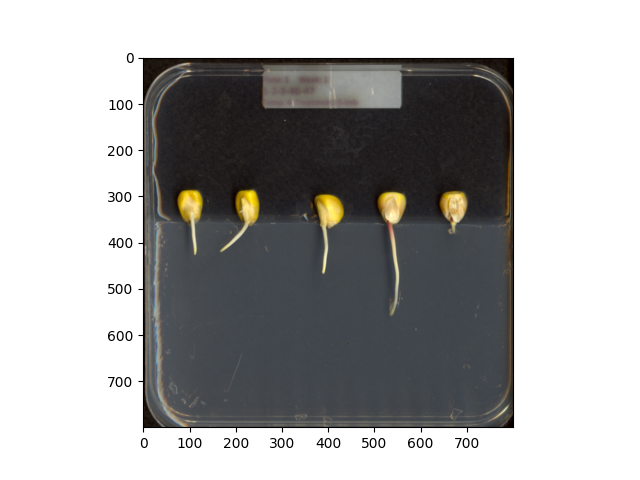

In [3]:
maize_seedlings = iio.imread(uri="data/maize-seedlings.tif")
print(maize_seedlings.shape)
fig, ax = plt.subplots()
ax.imshow(maize_seedlings)

In [7]:
mask = np.ones(shape=maize_seedlings.shape[0:2], dtype="bool")

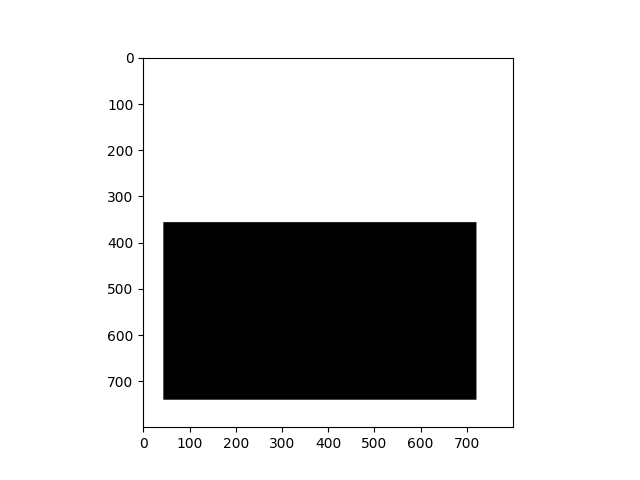

In [13]:
rr, cc = ski.draw.rectangle(start=(357,44), end=(740,720))
mask[rr,cc] = False

fig, ax = plt.subplots()
ax.imshow(mask, cmap='gray')

In [10]:
maize_seedlings[mask] = 0

fig, ax = plt.subplots()
ax.imshow(maize_seedlings)

NameError: name 'maize_seedlings' is not defined

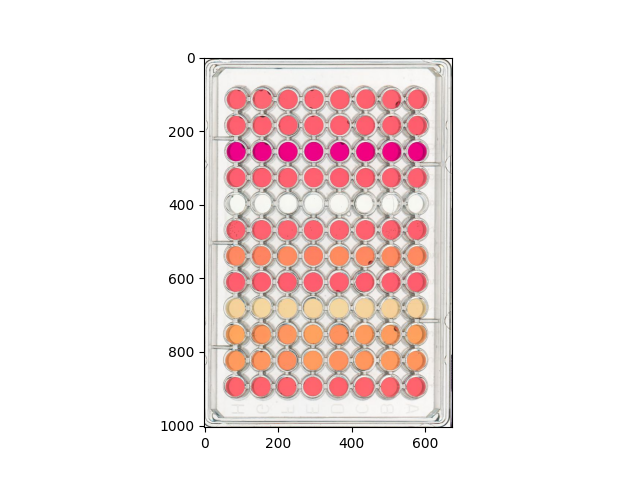

In [25]:
wellplate = iio.imread(uri="data/wellplate-01.jpg")
fig, ax = plt.subplots()
ax.imshow(wellplate)

/var/folders/r_/cll_fd0x6n59yv0ys46fn2xm0000gn/T/ipykernel_28655/2807470731.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


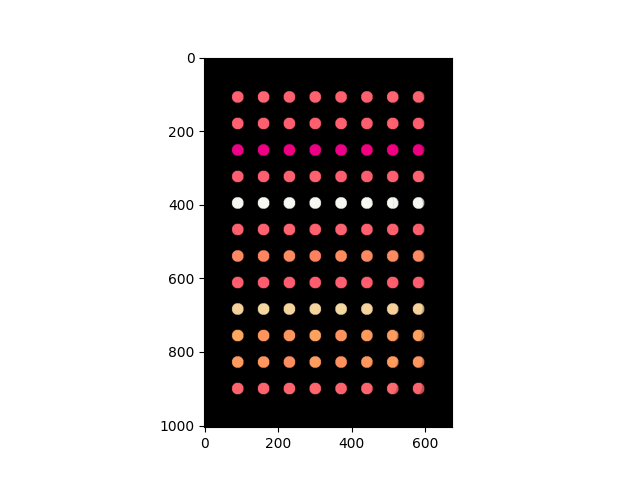

In [26]:
mask = np.ones(shape=(wellplate.shape[0:2]), dtype="bool")
wellplate_masked = np.array(wellplate)

with open(file="data/centers.txt", mode="r") as f:
    for line in f:
        coordinates = line.split()
        cx = int(coordinates[0])
        ry = int(coordinates[1])
        rr, cc = ski.draw.disk(center=(ry, cx), radius=16, shape=wellplate.shape[0:2])
        mask[rr, cc] = False

wellplate_masked[mask] = 0

fig, ax = plt.subplots()
ax.imshow(wellplate_masked)

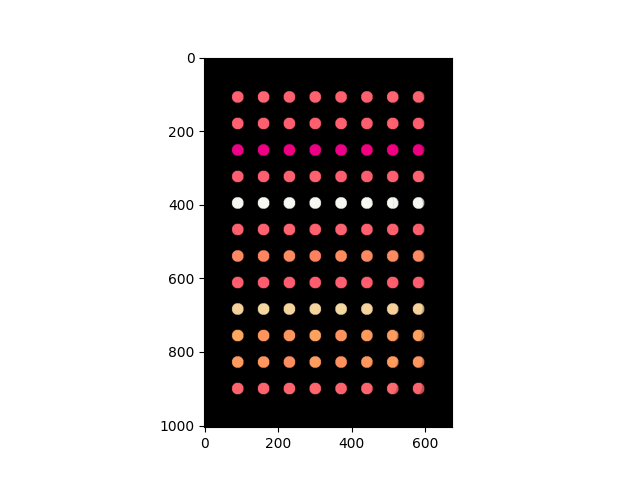

In [33]:
cxs = range(91, 672, 70)[0:8]
rys = range(108, 1000, 72)[0: 12]

mask2 = np.ones(shape=wellplate.shape[0:2], dtype="bool")
wellplate_masked_2 = np.array(wellplate)

for ry in rys:
    for cx in cxs:
        rr, cc = ski.draw.disk(center=(ry, cx), radius=16, shape=wellplate.shape[0:2])
        mask2[rr, cc] = False

wellplate_masked_2[mask2] = 0
fig, ax = plt.subplots()
ax.imshow(wellplate_masked_2)